<a href="https://colab.research.google.com/github/Emily-KD/DS200/blob/main/Lab6_EDA_for_flights_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6:  EDA using a massive airline dataset

For this lab, you'll need to access a 500MB+ dataset at kaggle.com.  First, register at kaggle.com, login and download the dataset at https://www.kaggle.com/usdot/flight-delays.  The dataset actually consists of three separate files, only one of which is huge.  

Next, visit https://drive.google.com/drive/my-drive and find a place to upload this dataset.  For instance, using the "New" button you can create a new folder where you'll upload the three files.  To allow the code below to access the files I uploaded, I created a folder called "data" inside the "Colab Notebooks" folder.

## Download and upload archive.zip

The way I handled obtaining this dataset, after I clicked the "download" button at the kaggle.com site above and then logged into kaggle, was to save the `archive.zip` file on my computer.  I did not unzip this file on my computer; instead, I uploaded `archive.zip` directly into my `drive/My Drive/Colab Notebooks/data/` folder using the "New" button followed by "File Upload".  At that point, I had to figure out how to use the zip extractor within google drive, then move all three of the .csv files into the `data` folder I had created.

This isn't the only way you can handle this step.  You might choose instead to unzip `archive.zip` on your own computer before uploading the three resulting .csv files to your google drive space.  It's up to you, as long as you wind up with `airlines.csv`, `airports.csv`, and `flights.csv` in a google drive folder you can access.  Frankly, I think it's probably less trouble to unzip on your own computer before uploading, but it's up to you.  

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After your three .csv files are in place, you have to make sure that your Jupyter notebook can access them from the google.colab environment.  That's what the code above does after you run it, by mounting the drive.  You can actually get the colab to insert this code block automatically if you click the folder icon along the left side of the screen and then click the "mount drive" icon that appears at the top of the left margin. 

## Change working directory

Next, we can change the working directory (folder) in which the Jupyter notebook looks for files.  First, let's see what the current working directory is using pwd (print working directory).

In [ ]:
pwd

'/content'

We can use cd (change directory) to change the working directory to a different folder.  A space has to be entered as `\ ` (backslash space).

In [ ]:
cd /content/drive/MyDrive/DS200/Lab/Lab6/data

/content/drive/MyDrive/DS200/Lab/Lab6/data


Finally, we can verify that the three .csv files are in the new working directory using ls (list).

In [ ]:
ls

airlines.csv  airports.csv  flights.csv


# Optional step:  Upgrade datascience library

You may recall that we've occasionally had to fix some of the Python code used in the textbook.  This was particularly true in Section 8.5, where the maps were produced.  The reason the fixes were needed is that the default datascience library used by the colab Jupyter notebooks is out of date.  If you want, you can update it as follows and then the textbook code should work without modification even in Section 8.5.

In [ ]:
!pip install --upgrade datascience

     |████████████████████████████████| 731 kB 5.4 MB/s 
     |████████████████████████████████| 95 kB 3.5 MB/s 
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
  Attempting uninstall: datascience
    Found existing installation: datascience 0.10.6
    Uninstalling datascience-0.10.6:
      Successfully uninstalled datascience-0.10.6


# Load the datascience library and other resources

Once all the data files are in place, we can get to the Python code.  The first step, as usual, is to load the necessary python resources:

In [ ]:
# Load needed python resources
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  after removing the cwd from sys.path.


Next, we'll read the largest of the three files as a `Table` object.

# Step1

In [ ]:
# This code only works if flights.csv is in the current working directory (see above)
flights = Table.read_table('flights.csv')

I downloaded the flights.csv on my computer and opened the file so it won't come up as a blank file on google drive. Then I uploaded the flights.csv files to my google drive space.

Let's check out the columns available in the flights dataset:

In [ ]:
flights.labels

('YEAR',
 'MONTH',
 'DAY',
 'DAY_OF_WEEK',
 'AIRLINE',
 'FLIGHT_NUMBER',
 'TAIL_NUMBER',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'SCHEDULED_DEPARTURE',
 'DEPARTURE_TIME',
 'DEPARTURE_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'SCHEDULED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'WHEELS_ON',
 'TAXI_IN',
 'SCHEDULED_ARRIVAL',
 'ARRIVAL_TIME',
 'ARRIVAL_DELAY',
 'DIVERTED',
 'CANCELLED',
 'CANCELLATION_REASON',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY')

Next, select a systematic sample of rows from the flights Table object using code similar to the Chapter 10 intro.  You'll need to figure out an appropriate value of 'gap' based on the lab instructions.

In [ ]:
flights.show(6)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,US,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20,-5,18,38,217,230,206,1589,604,6,602,610,8,0,0,nan,nan,nan,nan,nan,nan


#Step2

In [ ]:
gap = 782
start = np.random.choice(np.arange(gap))
mySample = flights.take(np.arange(start, flights.num_rows, gap))
print(mySample.num_rows)
mySample

1341


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2015,1,1,4,AS,573,N467AS,SAN,PDX,630,624,-6,17,641,160,158,136,933,857,5,910,902,-8,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,F9,935,N938FR,TTN,CVG,740,751,11,9,800,127,119,103,532,943,7,947,950,3,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,WN,1165,N373SW,MKE,MCO,840,837,-3,10,847,170,154,137,1066,1204,7,1230,1211,-19,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,AA,36,N3EKAA,SAN,DFW,935,928,-7,13,941,170,172,140,1171,1401,19,1425,1420,-5,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,EV,5978,N12921,ORD,IND,1025,1019,-6,15,1034,63,50,29,177,1203,6,1228,1209,-19,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,US,1923,N752US,CLT,DTW,1120,1117,-3,9,1126,108,102,85,500,1251,8,1308,1259,-9,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,B6,1129,N633JB,JFK,RSW,1205,1231,26,12,1243,193,183,165,1074,1528,6,1518,1534,16,0,0,nan,0,0,7,9,0
2015,1,1,4,OO,4461,N613QX,OAK,LAX,1258,1307,9,14,1321,82,82,56,337,1417,12,1420,1429,9,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,DL,901,N554NW,DTW,ATL,1345,1344,-1,14,1358,130,102,83,594,1521,5,1555,1526,-29,0,0,nan,nan,nan,nan,nan,nan
2015,1,1,4,AA,2479,N5FBAA,DFW,LAX,1435,1442,7,17,1459,205,187,165,1235,1544,5,1600,1549,-11,0,0,nan,nan,nan,nan,nan,nan


Simple random sample eliminates sample bias because it spells out the method of selecting the research variable. On the other hand, convenience sample leaves a lot of researcher's dicretion, which leads to several biases. However, convenience sample speeds up the research process.

Load the airports dataset containing airport names and latitude/longitude coordinates:


In [ ]:
airports = Table.read_table('airports.csv')

In [ ]:
airports.show(5)

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.6524,-75.4404
ABI,Abilene Regional Airport,Abilene,TX,USA,32.4113,-99.6819
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.0402,-106.609
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.4491,-98.4218
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.5355,-84.1945


## Try to understand the next code block, especially the join method

String together multiple Table-modifying methods (from the datascience module) to produce a cleaned-up version of the systematic sample called mySample (then print its number of rows and its first 10 rows):

1.   Select mySample according to 'gap' and 'start'.
2.   Then join every ORIGIN_AIRPORT in 'mysample' with the
 corresponding columns from 'airports' based on matching IATA_CODE.
3.   Then select just the columns we need from the result.
4.   Then relabel some of the columns.

#Step3

In [ ]:
mySample = (flights.take(np.arange(start, flights.num_rows, gap))
                   .join('ORIGIN_AIRPORT', airports, 'IATA_CODE')
                   .select('MONTH', 'DAY', 'ORIGIN_AIRPORT', 
                           'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 
                           'DEPARTURE_DELAY', 'AIRPORT',
                           'LATITUDE', 'LONGITUDE')
                   .relabeled('ORIGIN_AIRPORT', 'ORIGIN')
                   .relabeled('DESTINATION_AIRPORT', 'DESTINATION')
                   .relabeled('DEPARTURE_DELAY', 'DELAY')
                   .relabeled('AIRPORT', 'ORIGIN_NAME')
            )
print(mySample.num_rows)
mySample

1341


MONTH,DAY,ORIGIN,DESTINATION,SCHEDULED_DEPARTURE,DELAY,ORIGIN_NAME,LATITUDE,LONGITUDE
1,5,ABE,DTW,1253,-3,Lehigh Valley International Airport,40.6524,-75.4404
1,26,ABI,DFW,655,-11,Abilene Regional Airport,32.4113,-99.6819
1,4,ABQ,DAL,1830,70,Albuquerque International Sunport,35.0402,-106.609
1,11,ABQ,DFW,1535,10,Albuquerque International Sunport,35.0402,-106.609
2,16,ABQ,MCI,1150,-3,Albuquerque International Sunport,35.0402,-106.609
2,17,ABQ,DFW,724,-6,Albuquerque International Sunport,35.0402,-106.609
3,4,ABQ,PHX,1835,-8,Albuquerque International Sunport,35.0402,-106.609
3,8,ABQ,ORD,1313,-8,Albuquerque International Sunport,35.0402,-106.609
3,9,ABQ,IAH,855,0,Albuquerque International Sunport,35.0402,-106.609
3,10,ABQ,ATL,620,-4,Albuquerque International Sunport,35.0402,-106.609


By using the join method it only shows the data that has been selected from the file.  

#Step4
Create a new column with the approximate day of year. There are better, more accurate ways to do this, but this method that approximates each month by 30 days will work for this purpose:

In [ ]:
mySample = mySample.with_column(
             'DAY_OF_YEAR', 
             30*(mySample.column('MONTH')-1) + mySample.column('DAY'))
mySample

MONTH,DAY,ORIGIN,DESTINATION,SCHEDULED_DEPARTURE,DELAY,ORIGIN_NAME,LATITUDE,LONGITUDE,DAY_OF_YEAR
1,9,ABQ,SEA,1535,-21,Albuquerque International Sunport,35.0402,-106.609,9
1,25,ABQ,DAL,1905,-2,Albuquerque International Sunport,35.0402,-106.609,25
2,1,ABQ,DAL,800,-4,Albuquerque International Sunport,35.0402,-106.609,31
2,19,ABQ,IAH,855,-13,Albuquerque International Sunport,35.0402,-106.609,49
2,20,ABQ,IAH,855,-10,Albuquerque International Sunport,35.0402,-106.609,50
2,23,ABQ,SEA,1250,16,Albuquerque International Sunport,35.0402,-106.609,53
2,26,ABQ,DEN,1030,-4,Albuquerque International Sunport,35.0402,-106.609,56
2,16,ACY,RSW,600,-7,Atlantic City International Airport,39.4576,-74.5772,46
1,19,AGS,ATL,1715,-6,Augusta Regional Airport (Bush Field),33.37,-81.9645,19
2,10,AGS,ATL,1849,2,Augusta Regional Airport (Bush Field),33.37,-81.9645,40


# Step5
Recall that a scatterplot depicts the relationship between two quantitative measurement columns.  Create a scatterplot using the 'LATITUDE' and 'DELAY' columns.

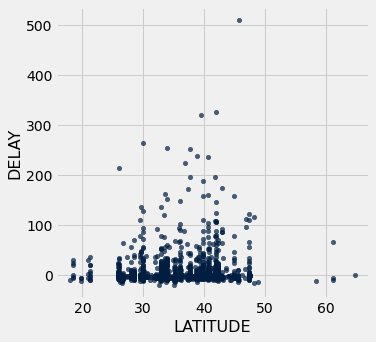

In [ ]:
mySample.scatter('LATITUDE', 'DELAY')

We've chosen LATITUDE because the DELAY data was scattered more than the LATITUDE data which will make it hard to read the plot.

# Step6

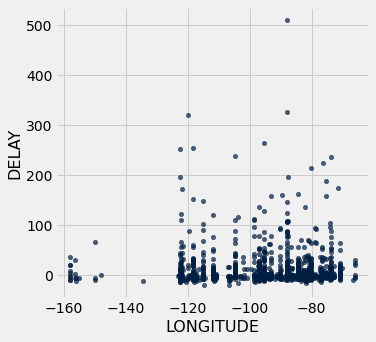

In [ ]:
mySample.scatter('LONGITUDE', 'DELAY')

There is a big (almost) blankbetween the longtitude of around -150 and around -130.

# Step7

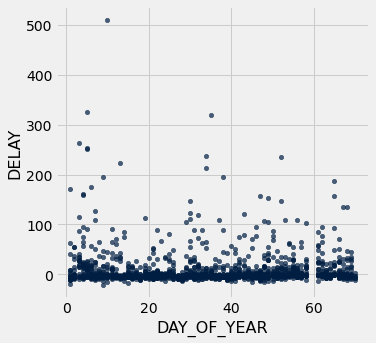

In [ ]:
mySample.scatter('DAY_OF_YEAR', 'DELAY')

For this plot there is a slight blank in the DELAY axis around day 60.

# EXTRA CODE
The code below is not strictly necessary for the lab assignment.  It is included to illustrate some potentially interesting directions you could take your own investigation:

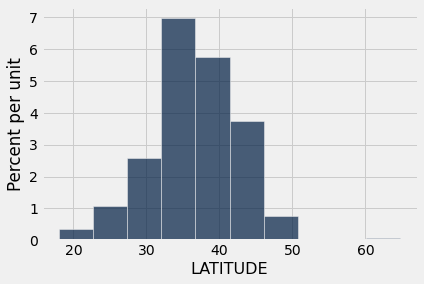

In [ ]:
# Create a histogram of LATITUDE
mySample.hist('LATITUDE')

In [ ]:
# Create a new column that splits the airports into high vs. low latitude
# based on a cutoff you define:
LatCut = 35
mySample = mySample.with_column(
              'HIGH_LAT', mySample.column('LATITUDE') > LatCut)
mySample

MONTH,DAY,ORIGIN,DESTINATION,SCHEDULED_DEPARTURE,DELAY,ORIGIN_NAME,LATITUDE,LONGITUDE,DAY_OF_YEAR,HIGH_LAT
1,9,ABQ,SEA,1535,-21,Albuquerque International Sunport,35.0402,-106.609,9,True
1,25,ABQ,DAL,1905,-2,Albuquerque International Sunport,35.0402,-106.609,25,True
2,1,ABQ,DAL,800,-4,Albuquerque International Sunport,35.0402,-106.609,31,True
2,19,ABQ,IAH,855,-13,Albuquerque International Sunport,35.0402,-106.609,49,True
2,20,ABQ,IAH,855,-10,Albuquerque International Sunport,35.0402,-106.609,50,True
2,23,ABQ,SEA,1250,16,Albuquerque International Sunport,35.0402,-106.609,53,True
2,26,ABQ,DEN,1030,-4,Albuquerque International Sunport,35.0402,-106.609,56,True
2,16,ACY,RSW,600,-7,Atlantic City International Airport,39.4576,-74.5772,46,True
1,19,AGS,ATL,1715,-6,Augusta Regional Airport (Bush Field),33.37,-81.9645,19,False
2,10,AGS,ATL,1849,2,Augusta Regional Airport (Bush Field),33.37,-81.9645,40,False


In [ ]:
# Figure out how many airports are "high latitude" vs. "low latitude"
mySample.group('HIGH_LAT')

HIGH_LAT,count
False,568
True,773


In [ ]:
# Take the means for the high- and low- latitude airports.
# We're using the 'nanmean' method in numpy to ignore the 
# nan (not a number) values
mySample.group('HIGH_LAT', np.nanmean)

HIGH_LAT,MONTH nanmean,DAY nanmean,ORIGIN nanmean,DESTINATION nanmean,SCHEDULED_DEPARTURE nanmean,DELAY nanmean,ORIGIN_NAME nanmean,LATITUDE nanmean,LONGITUDE nanmean,DAY_OF_YEAR nanmean
False,1.70951,13.3961,,,1351.31,7.08499,,30.9108,-97.1042,34.6813
True,1.68305,14.1022,,,1300.21,12.7633,,40.5624,-93.6438,34.5938


In [ ]:
# Use the previous idea to find the mean difference automatically
Observed_mean_difference = np.diff(mySample.group('HIGH_LAT', np.nanmean)
                                           .column('DELAY nanmean'))[0]
Observed_mean_difference

5.678346934888173

In [ ]:
# Define a function that will reshuffle the DELAY values and then return
# the mean difference statistic for the shuffled table.
# This simulates from the null hypothesis distribution of the 
# mean difference statistic.
def simulated_mean_difference_under_null():
    a=(mySample.sample(with_replacement=False)
               .select('DELAY')
               .with_column('HIGH_LAT', mySample.column('HIGH_LAT')))
    return (np.diff(a.group('HIGH_LAT', np.nanmean)
                     .column('DELAY nanmean'))[0])

In [ ]:
# Simulate 5000 draws from the null hypothesis distribution of the 
# mean difference (and return the result as a numpy array--not the same 
# as a datascience Table)
H0_means = make_array()
for i in np.arange(5000):
    H0_means = np.append(H0_means, simulated_mean_difference_under_null())

In [ ]:
# Create a table with the 5000 H0 (null hypothesis) values and then 
# create a histogram.
# Also add the observed value of the sample statistic as a red dot 
# along the x-axis.
Table().with_column(
    'Count in a Random Sample', H0_means
).hist(bins = np.arange(-12.5, 12.5, 1))
plots.scatter(Observed_mean_difference, 0, color='red', s=30);